# Back Bay National Wildlife Refuge
![Golden sunset over Back Bay, USFWS, Public Domain, https://www.fws.gov/media/golden-sunset-over-back-bay](usfws-golden-sunset-over-back-bay-medium.jpg)

"<a href="https://www.fws.gov/refuge/back-bay" target="_blank">Back Bay National Wildlife Refuge</a> is located in the southeastern corner of the City of Virginia Beach. The refuge was established in 1938 to protect and provide habitat for migrating and wintering waterfowl. Diverse habitats, including beachfront, freshwater marsh, dunes, shrub-scrub and upland forest are home to hundreds of species of birds, reptiles, amphibians, mammals and fish." This analysis looks at changes in annual average temperature at Back Bay NWR from 1954 to 2006. The site was located because of its coastal location in my home state of Virginia, and an interest in how coastal areas are responding to changing temperatures.


In [3]:
# Ignore FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import Packages
import pandas as pd
import holoviews as hv
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression


# Data Description
The data used were obtained from The Global Historical Climatology Network - Daily (GHCN-Daily/GHCNd). GHCNd collects land surface observations from over 90,000 land-based stations including measurements from the World Meteorological Organization, Cooperative, and CoCoRaHS networks. Sample data were from Jan 1, 1954 and Dec 31, 2006 to avoid annual averages that did not include a full year of data. Observed temperature readings used in this analysis are recorded in tenths of degrees C and recorded at T-16:00 daily.

Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. Station USC00440385 Bay National Wildlife Refuge, Virginia Beach, VA. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ 2024-09-24.

Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and Tamara G. Houston, 2012: An Overview of the Global Historical Climatology Network-Daily Database. J. Atmos. Oceanic Technol., 29, 897-910. doi:10.1175/JTECH-D-11-00103.1.

In [4]:
# Assign data URL to a variable.
Back_Bay_url = ('https://www.ncei.noaa.gov/access/services/data/v1?'
            'dataset=daily-summaries'
            '&dataTypes=TOBS'
            '&stations=USC00440385'
            '&startDate=1954-01-01'
            '&endDate=2006-12-31'
            '&units=metric')
Back_Bay_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TOBS&stations=USC00440385&startDate=1954-01-01&endDate=2006-12-31&units=metric'

# Analysis

To gain insights into the climate of Back Bay NWR, we performed an ordinary least squares (OLS) regression on annual average temperatures derived from daily observed temperature data. The following code cells details how the analysis was conducted, following instructions from the <a href="https://cu-esiil-edu.github.io/esiil-learning-portal/foundations/notebooks/01-climate/climate.html" target="_blank">ESIIL Earth Data Analytics - Course Textbook</a>

In [5]:
# Open the csv data as a pandas dataframe.
Back_Bay_df = pd.read_csv(
    Back_Bay_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN'])
Back_Bay_df

,STATION,TOBS
DATE,,
1954-01-01,USC00440385,10.0
1954-01-02,USC00440385,7.8
1954-01-03,USC00440385,8.3
1954-01-04,USC00440385,3.9
1954-01-05,USC00440385,17.2
...,...,...
2006-12-27,USC00440385,12.2
2006-12-28,USC00440385,11.7
2006-12-29,USC00440385,12.8


In [6]:
# Since the station name will not be used for analysis,
# select the column for temperature at time of observation and 
# reassign to the dataframe.
Back_Bay_df = Back_Bay_df[['TOBS']]
Back_Bay_df

,TOBS
DATE,
1954-01-01,10.0
1954-01-02,7.8
1954-01-03,8.3
1954-01-04,3.9
1954-01-05,17.2
...,...
2006-12-27,12.2
2006-12-28,11.7
2006-12-29,12.8


In [7]:
# Resample data to obtain the mean annual temperature.
ann_Back_Bay_df = Back_Bay_df.resample('YS').mean()
ann_Back_Bay_df.head()

,TOBS
DATE,
1954-01-01,16.236639
1955-01-01,15.188022
1956-01-01,15.817403
1957-01-01,15.886150
1958-01-01,14.340278


In [8]:
# Set the index to the year of the old index values to prevent 
# compatibility issues between data types during analysis.
ann_Back_Bay_df.index = ann_Back_Bay_df.index.year.values
ann_Back_Bay_df.head()

,TOBS
1954,16.236639
1955,15.188022
1956,15.817403
1957,15.886150
1958,14.340278


In [9]:
# Plot the annual data interactively
ann_Back_Bay_plt = ann_Back_Bay_df.hvplot(y='TOBS',
    title='Observed Mean Annual Temperature (C) of \nBack Bay National Wildlife Refuge, VA, USA',
    xlabel='Year',
    ylabel='Mean Annual Temperature (Celsius)'
    )

ann_Back_Bay_plt

:Curve   [index]   (TOBS)

In [10]:
# Fit an OLS Linear Regression to the data

# Drop NaN values
ann_Back_Bay_df_clean = ann_Back_Bay_df.dropna()

# Reshape 'Year' column to be a 2D array for scikit-learn
X = ann_Back_Bay_df_clean.index.values.reshape(-1,1)
Y = ann_Back_Bay_df_clean['TOBS'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, Y)

# Get the slope to understand the average warming per year
slope = model.coef_[0]

# Print the results
print(("From 1954 to 2006, Back Bay NWF has warmed an average of {}"
       " \N{DEGREE SIGN}C per year.").format(round(slope, 3)))

From 1954 to 2006, Back Bay NWF has warmed an average of 0.087 °C per year.


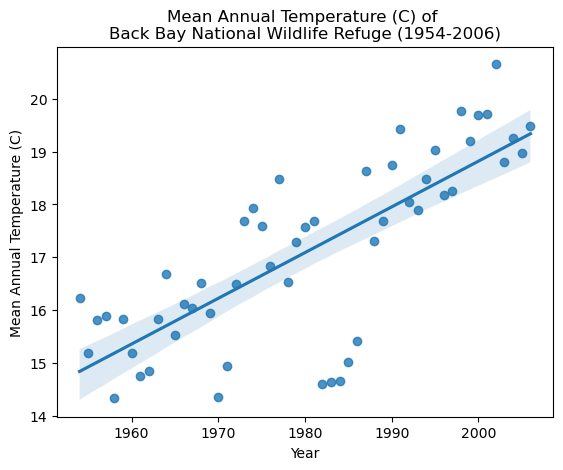

In [11]:
# Plot annual average temperature data with a trend line
BBNWF_plot = sns.regplot(
    x=ann_Back_Bay_df_clean.index.values, 
    y=ann_Back_Bay_df_clean['TOBS'].values,
    )
# Set plot labels
BBNWF_plot.set(
    title='Mean Annual Temperature (C) of \nBack Bay National '
        'Wildlife Refuge (1954-2006)',
    xlabel='Year',
    ylabel='Mean Annual Temperature (C)'
)
# Display the plot without extra text
plt.show()

# 50 Years of Temperature Data Show Rising Temperatures at Back Bay National Wildlife Refuge, VA
From 1954 to 2006, Back Bay NWR has warmed an average of 0.087&deg;C per year. At 0.87&deg;C per decade, this rate of warming is over four times that of the <a href="https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature" target="_blank">global rate of warming from 1982 to 2023 as calculated by NOAA (0.20&deg;C per decade)</a>. It was interesting to note the period of cooler temperatures observed starting in 1982, which coincided with a <a href="https://psl.noaa.gov/enso/climaterisks/years/top24enso.html" targe="_blank">strong El Nino event</a>. Looking into this also lead me to learn about the <a hre="https://volcano.oregonstate.edu/el-chichon-mexico-1982" target="_blank">El Chichon volcanic eruption of 1982</a>, which also likely contributed to cooler temperatures, as the aerosol sulfur dioxide emitted from the eruption reflects solar radiation.
Daily temperatures were averaged into an annual temperature and plotted as a scatterplot. The rate of warming was described by an ordinary least squares (OLS) regression.